In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /Users/davinci/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/davinci/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Las 25 palabras más comunes en la columna: description
[('cliente', 721), ('encargo', 687), ('firma', 588), ('fiduciaria', 531), ('id', 527), ('one', 505), ('cc', 500), ('nic', 473), ('correo', 408), ('documentos', 403), ('preventas', 376), ('firmas', 363), ('davinci', 356), ('asignado', 354), ('proveedor', 353), ('grupo', 352), ('buen', 352), ('prado', 351), ('vanegas', 348), ('asignación', 341), ('sebastián', 338), ('dia', 295), ('fecha', 288), ('proyecto', 280), ('constructora', 278)]


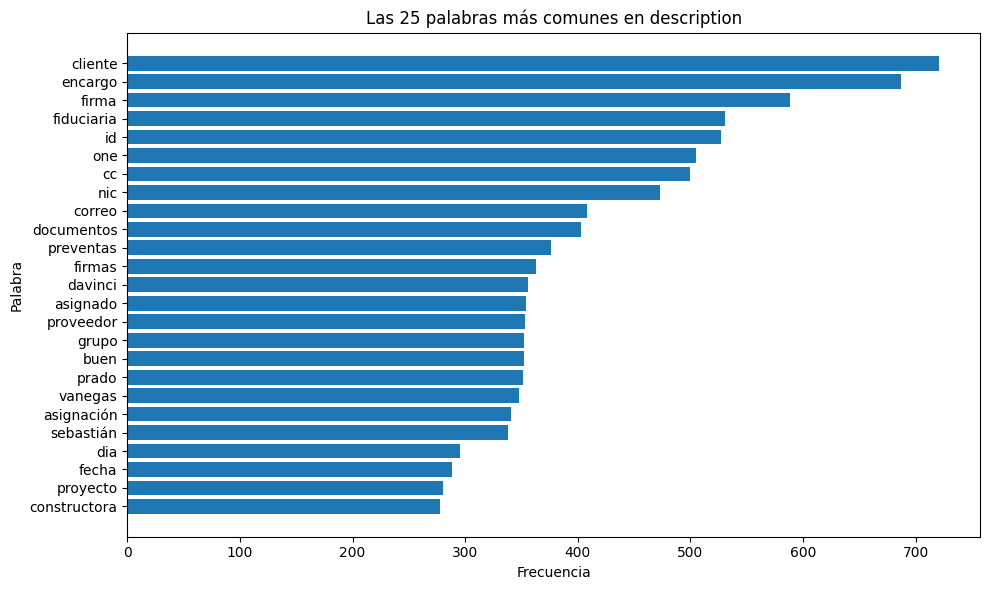


Las 10 palabras más comunes en la columna: close_code
[('corresponde', 534), ('incidente', 513), ('solución', 326), ('respuesta', 222), ('usuario', 222), ('permanente', 209), ('temporal', 117), ('intervención', 36), ('solicitante', 16), ('operativo', 8)]


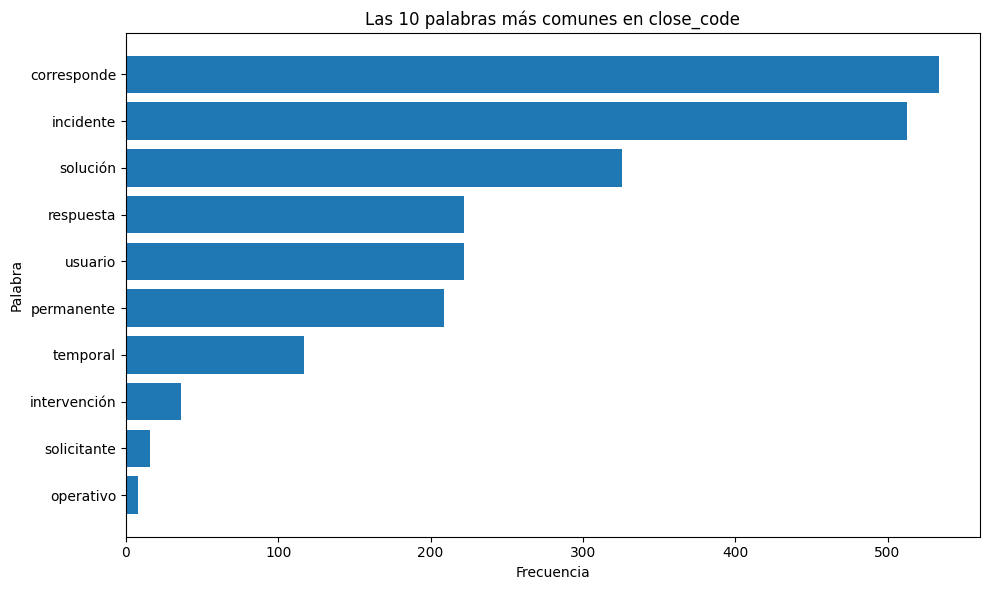

In [14]:

def word_frequency_eda(df, text_column, top_n=20):
    """Analiza la frecuencia de las palabras más comunes en una columna de texto."""
    stop_words = set(stopwords.words('spanish'))  # Puedes cambiar el idioma si es necesario
    all_words = []
    for text in df[text_column].astype(str):
        words = word_tokenize(text.lower())
        words = [word for word in words if word.isalnum() and word not in stop_words]
        all_words.extend(words)

    word_counts = Counter(all_words)
    most_common = word_counts.most_common(top_n)

    print(f"\nLas {top_n} palabras más comunes en la columna: {text_column}")
    print(most_common)

    words, counts = zip(*most_common)
    plt.figure(figsize=(10, 6))
    plt.barh(words[::-1], counts[::-1])
    plt.xlabel("Frecuencia")
    plt.ylabel("Palabra")
    plt.title(f"Las {top_n} palabras más comunes en {text_column}")
    plt.tight_layout()
    plt.show()

# Ejemplo de uso:
df = pd.read_csv('/Users/davinci/Desktop/tickets_clasificator/data_project/processed_data/tickets_1.csv')
word_frequency_eda(df, 'description', top_n=25)
word_frequency_eda(df, 'close_code', top_n=10)


Los 10 bigramas más comunes en la columna: description
[(('one', 'id'), 504), (('preventas', 'fiduciaria'), 356), (('fiduciaria', 'one'), 356), (('proveedor', 'davinci'), 351), (('davinci', 'preventas'), 351), (('id', 'asignado'), 349), (('prado', 'vanegas'), 347), (('asignación', 'proveedor'), 338), (('asignado', 'sebastián'), 338), (('sebastián', 'prado'), 338)]


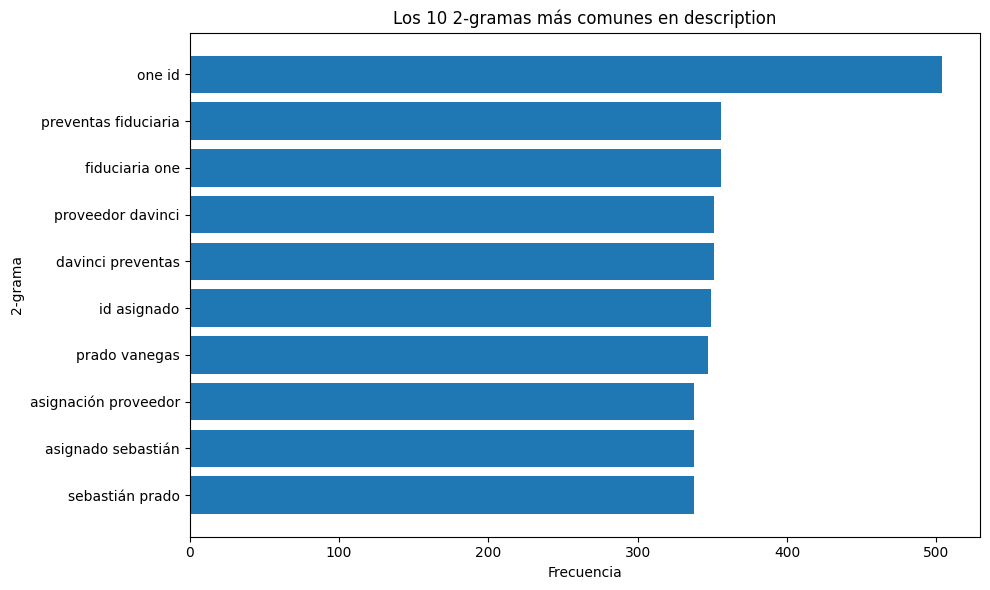


Los 10 bigramas más comunes en la columna: close_notes
[(('buen', 'dia'), 418), (('cordial', 'saludo'), 282), (('saludo', 'buen'), 224), (('obtuvo', 'respuesta'), 222), (('respuesta', 'usuario'), 222), (('usuario', 'cerrado'), 222), (('cerrado', 'sistema'), 222), (('cualquier', 'solicitud'), 219), (('solicitud', 'adicional'), 219), (('buenas', 'tardes'), 214)]


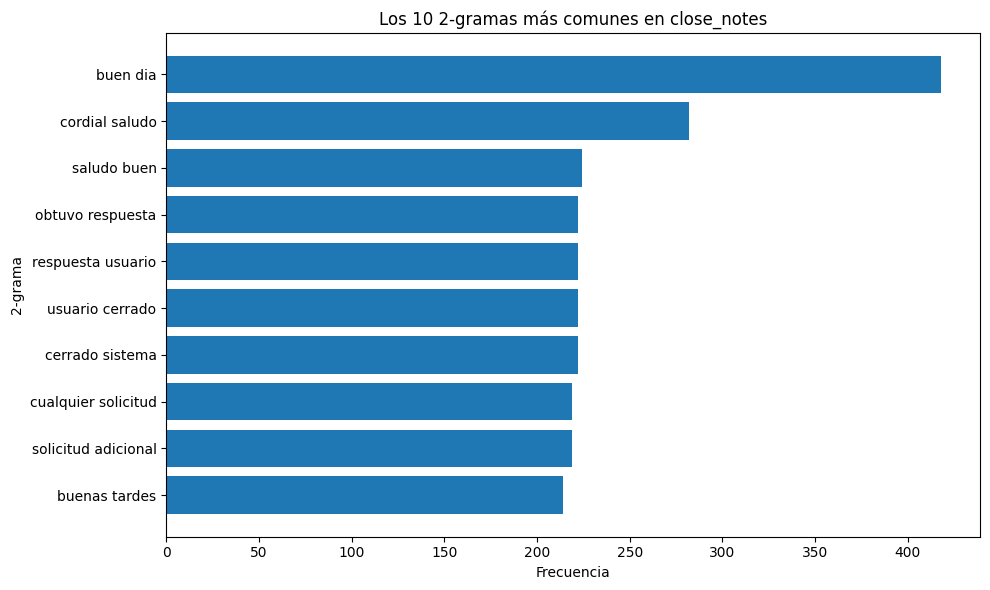

In [15]:
def ngrams_frequency_eda(df, text_column, n=2, top_n=20):
    """Analiza la frecuencia de n-gramas más comunes en una columna de texto."""
    stop_words = set(stopwords.words('spanish'))
    all_ngrams = []
    for text in df[text_column].astype(str):
        words = word_tokenize(text.lower())
        words = [word for word in words if word.isalnum() and word not in stop_words]
        n_grams = ngrams(words, n)
        all_ngrams.extend(n_grams)

    ngram_counts = Counter(all_ngrams)
    most_common = ngram_counts.most_common(top_n)

    print(f"\nLos {top_n} bigramas más comunes en la columna: {text_column}")
    print(most_common)

    ngrams_str, counts = zip(*most_common)
    ngrams_str = [' '.join(ngram) for ngram in ngrams_str]
    plt.figure(figsize=(10, 6))
    plt.barh(ngrams_str[::-1], counts[::-1])
    plt.xlabel("Frecuencia")
    plt.ylabel(f"{n}-grama")
    plt.title(f"Los {top_n} {n}-gramas más comunes en {text_column}")
    plt.tight_layout()
    plt.show()

# Ejemplo de uso para bigramas:

ngrams_frequency_eda(df, 'description', n=2, top_n=10)
ngrams_frequency_eda(df, 'close_notes', n=2, top_n=10)


Los 10 trigramas más comunes en la columna: description
[(('preventas', 'fiduciaria', 'one'), 356), (('fiduciaria', 'one', 'id'), 356), (('proveedor', 'davinci', 'preventas'), 351), (('davinci', 'preventas', 'fiduciaria'), 351), (('one', 'id', 'asignado'), 349), (('asignación', 'proveedor', 'davinci'), 338), (('id', 'asignado', 'sebastián'), 338), (('asignado', 'sebastián', 'prado'), 338), (('grupo', 'asignación', 'proveedor'), 337), (('sebastián', 'prado', 'vanegas'), 336)]


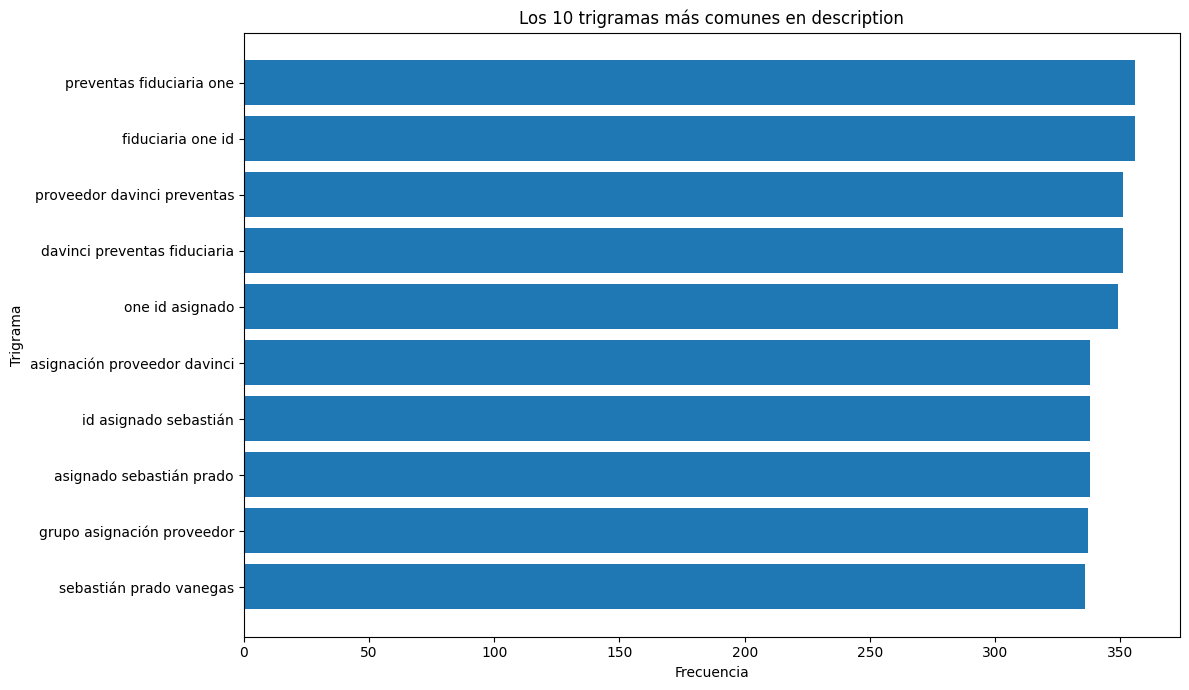


Los 10 trigramas más comunes en la columna: close_notes
[(('cordial', 'saludo', 'buen'), 224), (('obtuvo', 'respuesta', 'usuario'), 222), (('respuesta', 'usuario', 'cerrado'), 222), (('usuario', 'cerrado', 'sistema'), 222), (('cualquier', 'solicitud', 'adicional'), 219), (('saludo', 'buen', 'dia'), 203), (('adicional', 'causal', 'incidente'), 148), (('solicitud', 'adicional', 'causal'), 146), (('queda', 'pendiente', 'cualquier'), 139), (('pendiente', 'cualquier', 'solicitud'), 139)]


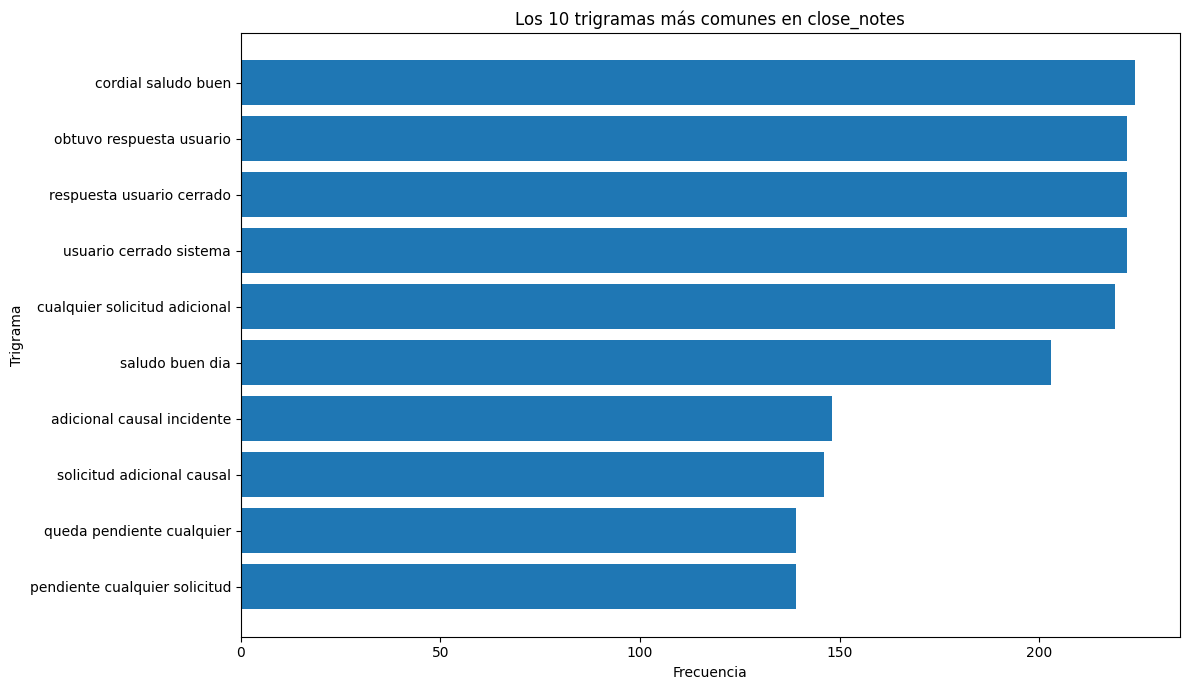

In [16]:
def trigrams_frequency_eda(df, text_column, top_n=20):
    """Analiza la frecuencia de los trigramas más comunes en una columna de texto."""
    stop_words = set(stopwords.words('spanish'))
    all_trigrams = []
    for text in df[text_column].astype(str):
        words = word_tokenize(text.lower())
        words = [word for word in words if word.isalnum() and word not in stop_words]
        trigrams = ngrams(words, 3)  # Generamos trigramas (n=3)
        all_trigrams.extend(trigrams)

    trigram_counts = Counter(all_trigrams)
    most_common = trigram_counts.most_common(top_n)

    print(f"\nLos {top_n} trigramas más comunes en la columna: {text_column}")
    print(most_common)

    trigrams_str, counts = zip(*most_common)
    trigrams_str = [' '.join(trigram) for trigram in trigrams_str]
    plt.figure(figsize=(12, 7))  # Ajustamos el tamaño para mejor visualización de trigramas
    plt.barh(trigrams_str[::-1], counts[::-1])
    plt.xlabel("Frecuencia")
    plt.ylabel("Trigrama")
    plt.title(f"Los {top_n} trigramas más comunes en {text_column}")
    plt.tight_layout()
    plt.show()

# Ejemplo de uso:

trigrams_frequency_eda(df, 'description', top_n=10)
trigrams_frequency_eda(df, 'close_notes', top_n=10)

In [17]:
def generate_category_wordclouds(df: pd.DataFrame, 
                                 name_column_text: str, 
                                 name_column_target: str):
    """This function is used to generate the wordclouds of the text"""
    unique_categories = df[name_column_target].unique()[:10]
    for category in unique_categories:
        filtered_text = ' '.join(df[df[name_column_target] == category][name_column_text])
        print(f" unique tokens for class: {len(set(filtered_text.split()))}")
        if filtered_text:
            wordcloud = WordCloud(width=800, height=600, background_color='white',
                                  colormap='viridis', max_words=150, contour_color='steelblue',
                                  contour_width=2, prefer_horizontal=0.8).generate(filtered_text)
            plt.figure(figsize=(8, 8))  # Tamaño de la figura para mejorar la resolución
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f"Word Cloud for Category: {category}")
            plt.show()

 unique tokens for class: 10


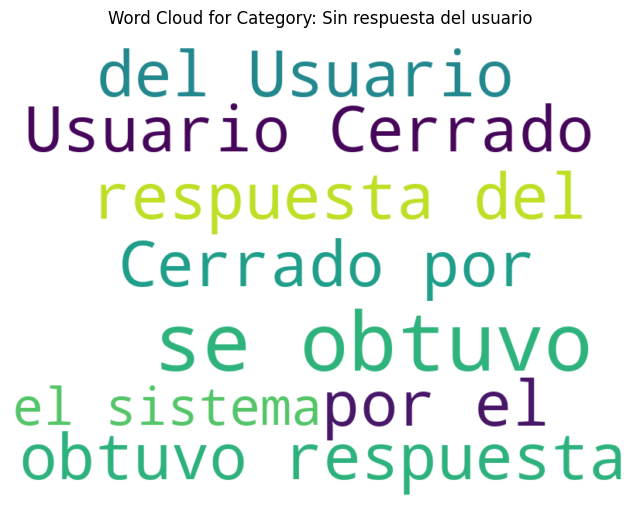

 unique tokens for class: 1296


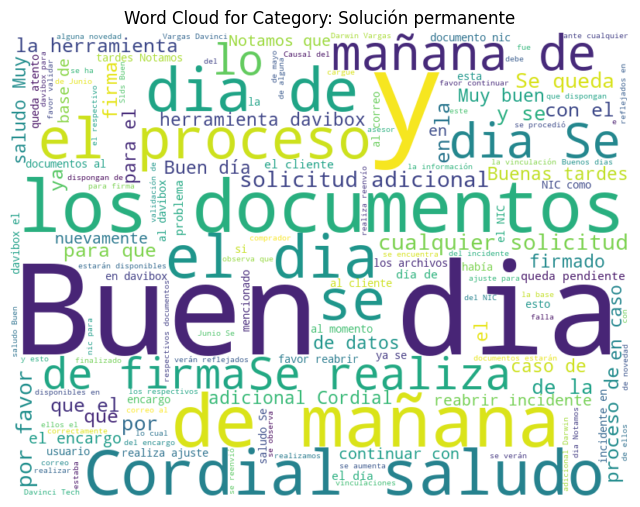

 unique tokens for class: 2438


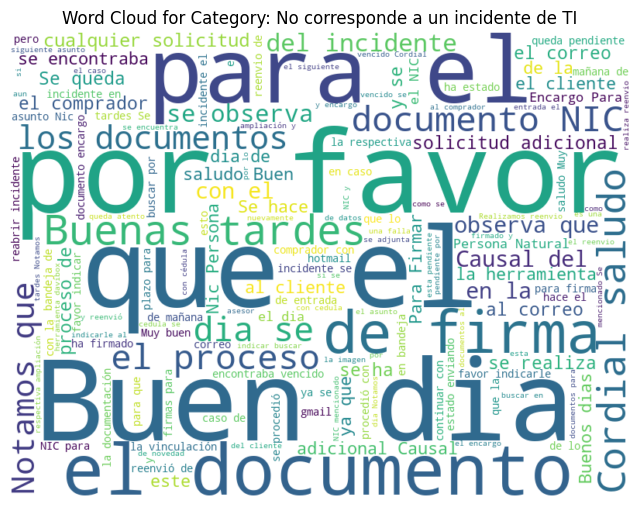

 unique tokens for class: 3


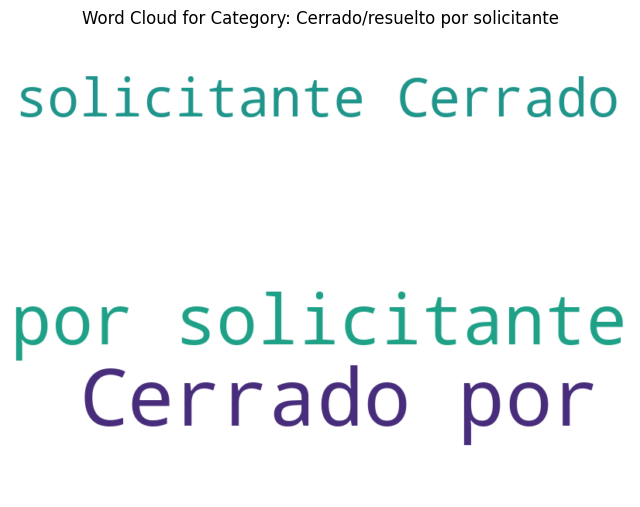

 unique tokens for class: 565


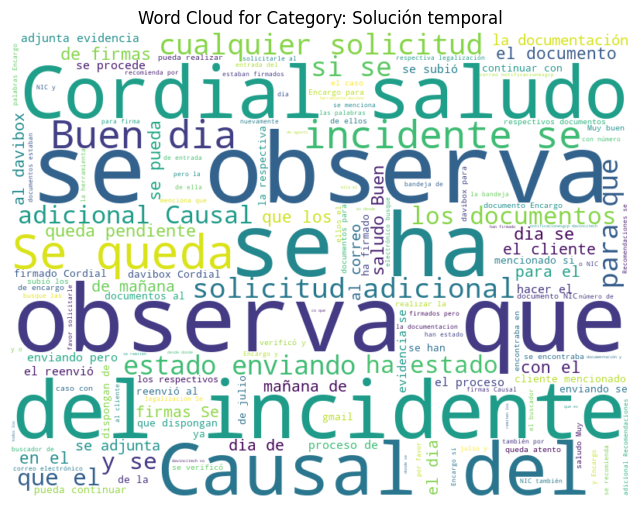

 unique tokens for class: 285


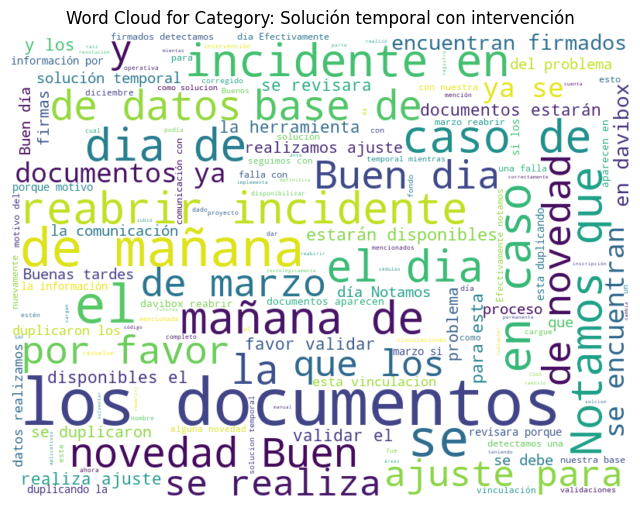

 unique tokens for class: 317


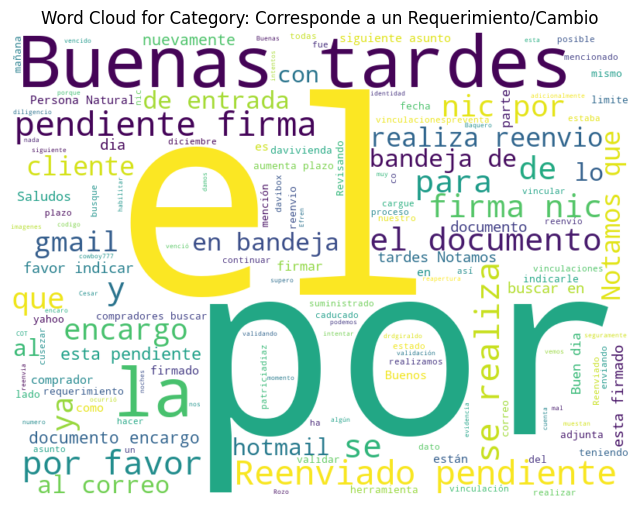

 unique tokens for class: 136


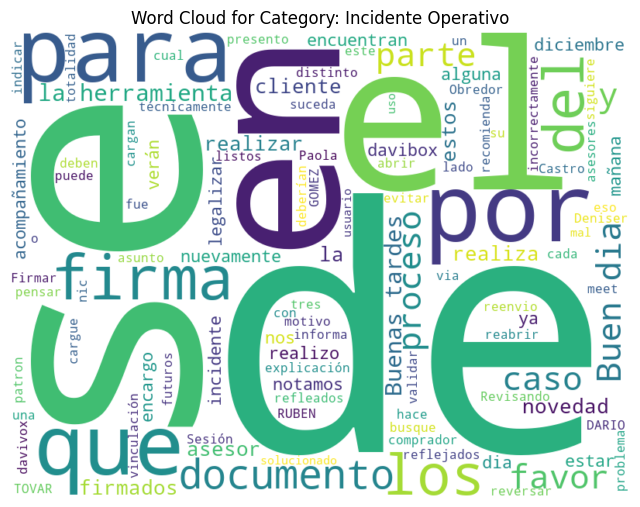

 unique tokens for class: 153


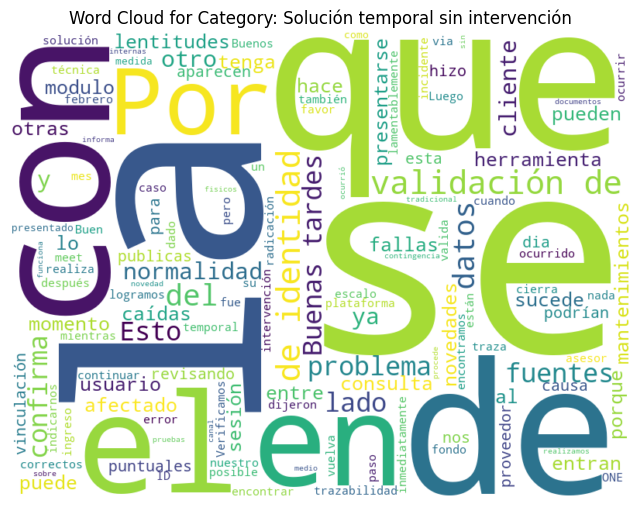

In [18]:
generate_category_wordclouds(df = df, 
                             name_column_target= "close_code", 
                             name_column_text= "close_notes")

In [21]:
def plot_ngrams(df: pd.DataFrame, 
                name_column_text: str, 
                name_column_target: str, 
                ngram_range=(2, 3), 
                top_n=5) -> None:
    """This function is used to plot the n-grams of the text
    Args:
        df (pd.DataFrame): DataFrame with the text to analyze
        ngram_range (tuple, optional): Range of n-grams to analyze. Defaults to (2, 3).
        top_n (int, optional): Number of n-grams to return. Defaults to 10."""
    unique_categories = df[name_column_target].unique()[:8]

    fig, axs = plt.subplots(len(unique_categories), 2, figsize=(12, 2 * len(unique_categories)))

    for i, category in enumerate(unique_categories):
        filtered_text = df[df[name_column_target] == category][name_column_text]
        filtered_text = filtered_text.astype(str) 
        
        vectorizer = CountVectorizer(ngram_range=ngram_range)
        X = vectorizer.fit_transform(filtered_text)
        
        # Obtener los n-gramas y su frecuencia
        ngram_freq = list(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0]))
        ngram_freq = sorted(ngram_freq, key=lambda x: x[1], reverse=True)
        
        bigrams = [ngram[0] for ngram in ngram_freq if len(ngram[0].split()) == 2][:top_n]
        bigram_frequencies = [ngram[1] for ngram in ngram_freq if len(ngram[0].split()) == 2][:top_n]
        
        trigrams = [ngram[0] for ngram in ngram_freq if len(ngram[0].split()) == 3][:top_n]
        trigram_frequencies = [ngram[1] for ngram in ngram_freq if len(ngram[0].split()) == 3][:top_n]

        if bigrams:
            axs[i, 0].barh(bigrams, bigram_frequencies, color='skyblue')
            axs[i, 0].set_xlabel('Frequency')
            axs[i, 0].set_title(f'Top {top_n} Bigrams:\n{category[:45]}...', fontsize=6)
            axs[i, 0].invert_yaxis()

            for j, freq in enumerate(bigram_frequencies):
                axs[i, 0].text(freq, j, str(freq), ha='left', va='center')

        if trigrams:
            axs[i, 1].barh(trigrams, trigram_frequencies, color='salmon')
            axs[i, 1].set_xlabel('Frequency')
            axs[i, 1].set_title(f'Top {top_n} Trigrams:\n{category[:45]}...', fontsize=6)
            axs[i, 1].invert_yaxis()

            for j, freq in enumerate(trigram_frequencies):
                axs[i, 1].text(freq, j, str(freq), ha='left', va='center')

    plt.subplots_adjust(hspace=0.5)
    plt.tight_layout()
    plt.show()
[50]

[50]

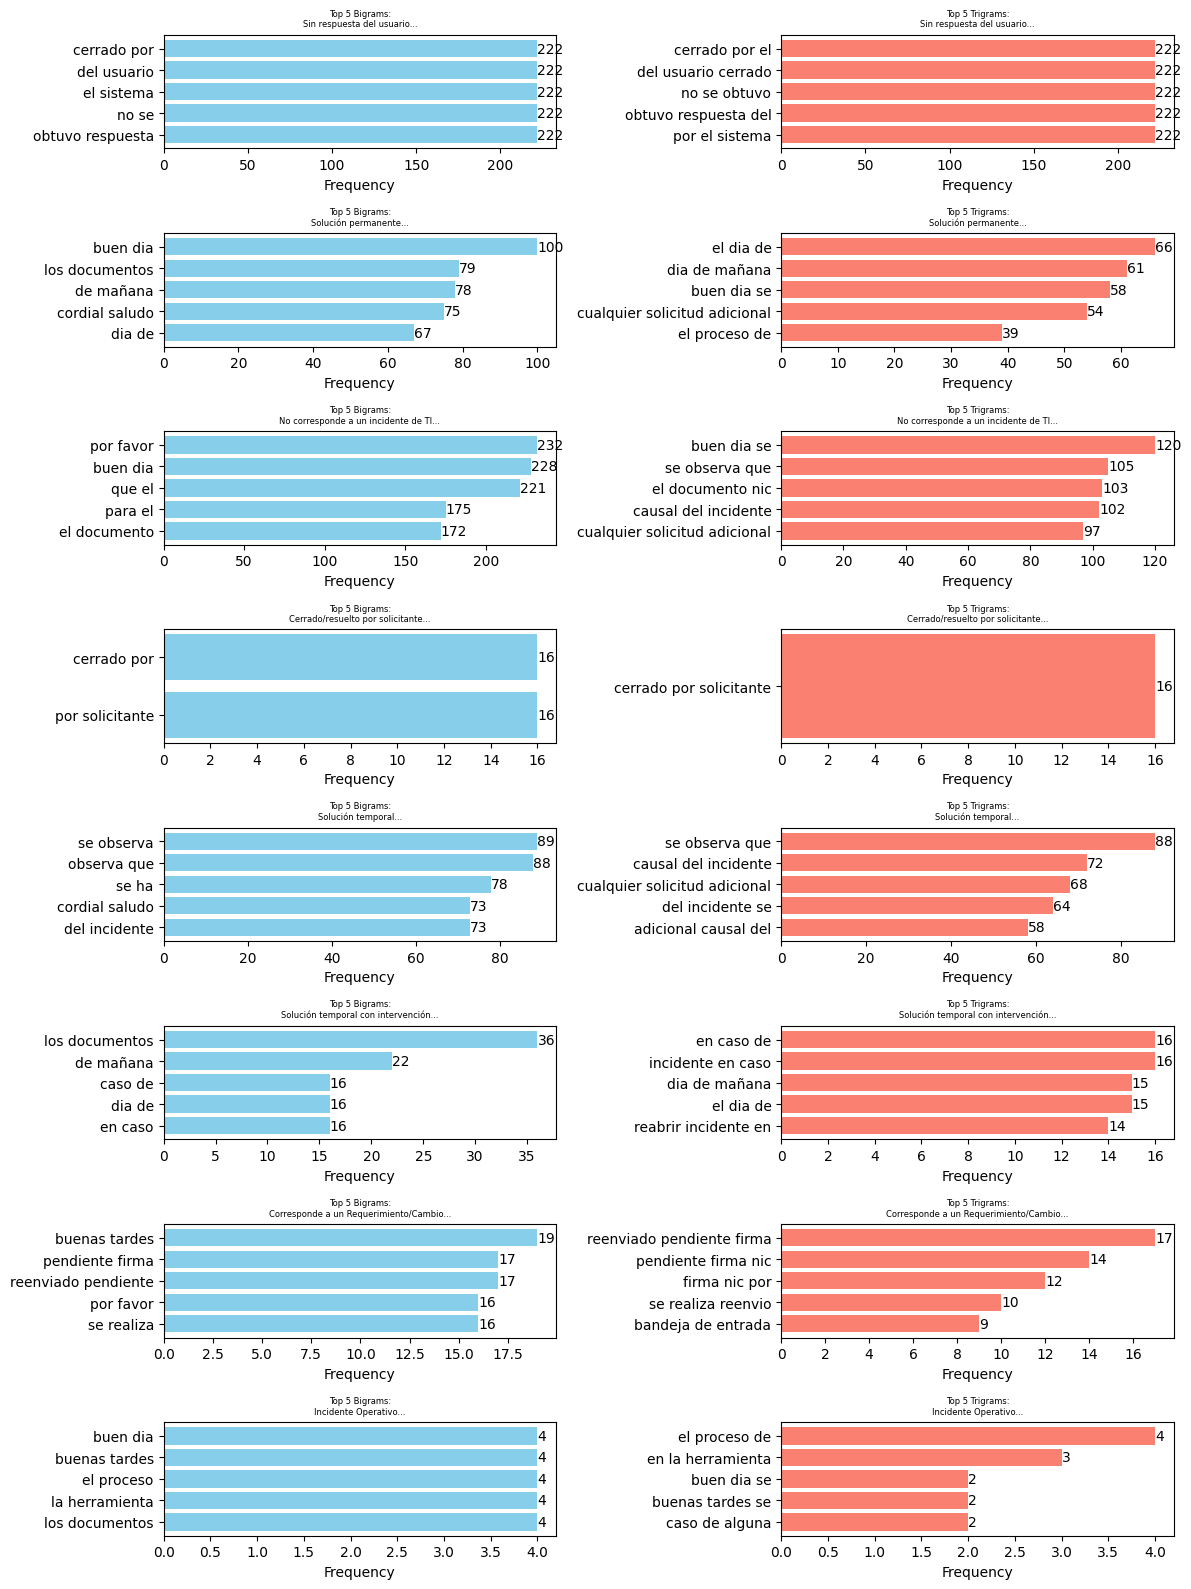

In [22]:
plot_ngrams(df, "close_notes", "close_code")